<a href="https://colab.research.google.com/github/ssubbinn/ESAA-OB/blob/main/11%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 50~86

## 3. 케라스

### 1. 딥러닝 준비

**1-1 주요 용어**

1) 하이퍼파라미터 : 사용자가 직접 설정해주는 설정 값

2) 과소적합 vs 과대적합

3) 에포크 : 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프

4) 손실함수 : 예측 값과 정답 값의 차이 또는 오차


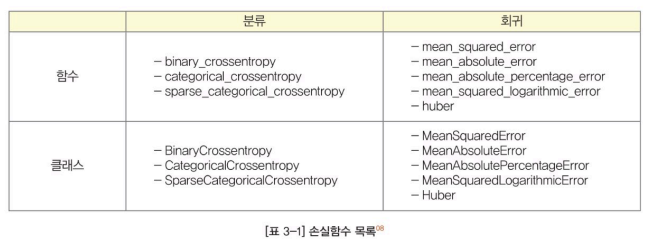

In [2]:
import tensorflow as tf

#클래스
tf.keras.losses.BinaryCrossentropy()

#함수
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

5) 경사하강법 : 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방

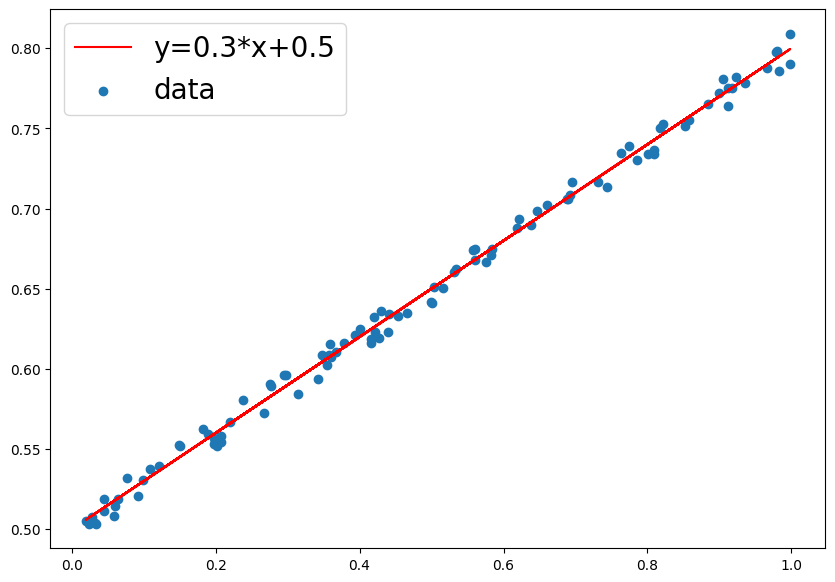

w:0.3, b:0.5


In [3]:
import numpy as np
import matplotlib.pyplot as plt

#샘플에 활용한 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x=np.random.rand(size)
  y=w*x+b
  noise=np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy=y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x, y, color='r', label=f'y={w}*x+{b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x, yy

x, y= make_linear(w=0.3, b=0.5, size=100, noise=0.01)

실제 데이터는 약간의 노이즈가 추가되어 있음.

이제 경사하강법 알고리즘의 핵심인 w, b 에 대한 그래디언트를 구하는 부분만 구현하면 된다. 손실함수를 w, b에 대해 각각 편미분하여 학습률 계수를 곱하고 이전 w, b에서 차감.

In [4]:
#최대 반복 횟수
num_epoch=1000

#학습률 -> 오차가 0.005 이내로 수렴하면 반복문을 종료
learning_rate=0.005

#에러 기록
errors=[]

#random 한 값으로 w, b 초기화
w=np.random.uniform(low=0.0, high=1.0)
b=np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  #가설 정의
  y_hat=w*x+b

  #손실 함수 정의
  error=0.5*((y_hat-y)**2).sum()
  if error<0.005:
    break
  #그라디언트 미분 계산
  w=w-learning_rate*((y_hat-y)*x).sum()
  b=b-learning_rate*(y_hat-y).sum()

  errors.append(error)

  if epoch%5==0:
    print('{0:2}w={1:.5f}, b={2:.5f} error ={3:.5f}'.format(epoch, w, b, error))

print('----'*15)
print('{0:2}w={1:.1f}, b={2:.1f} error ={3:.5f}'.format(epoch, w, b, error))

 0w=0.70396, b=0.26812 error =0.97824
 5w=0.64670, b=0.32014 error =0.56397
10w=0.59105, b=0.34910 error =0.39760
15w=0.54430, b=0.37330 error =0.28046
20w=0.50506, b=0.39360 error =0.19797
25w=0.47214, b=0.41063 error =0.13989
30w=0.44451, b=0.42493 error =0.09899
35w=0.42133, b=0.43692 error =0.07019
40w=0.40188, b=0.44699 error =0.04991
45w=0.38556, b=0.45544 error =0.03563
50w=0.37186, b=0.46252 error =0.02558
55w=0.36037, b=0.46847 error =0.01850
60w=0.35072, b=0.47346 error =0.01351
65w=0.34263, b=0.47765 error =0.01000
70w=0.33584, b=0.48116 error =0.00753
75w=0.33014, b=0.48411 error =0.00579
------------------------------------------------------------
79w=0.3, b=0.5 error =0.00478


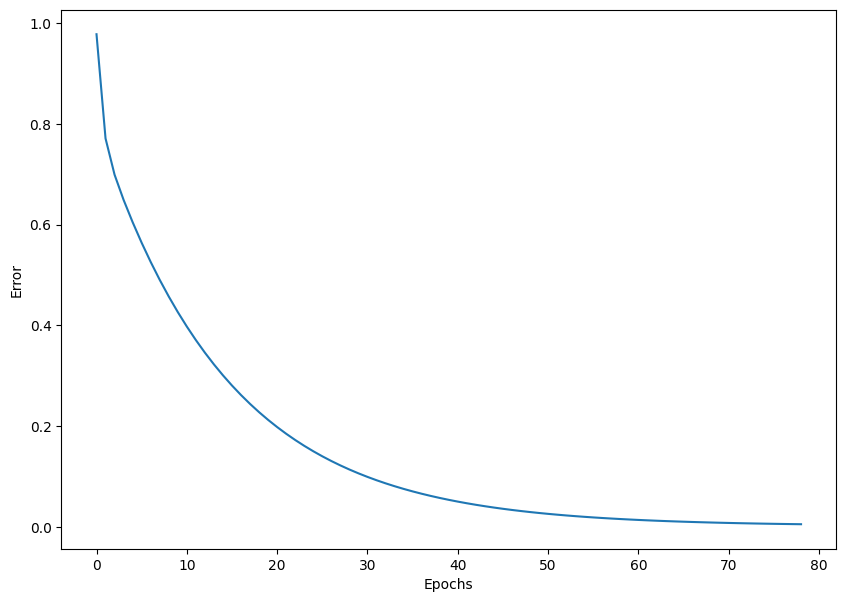

In [5]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

**1-2 딥러닝 프로세스**

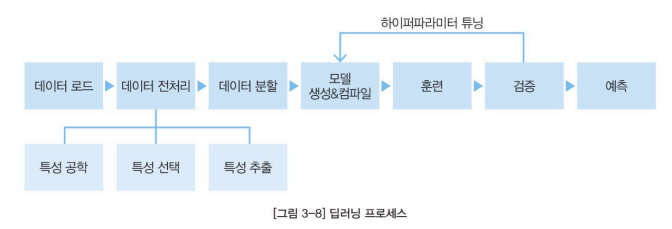

1) 데이터 전처리

2) 모델 생성

3) 모델 컴파일 : 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의. 모델 인스턴스에 compile() 메소드를 적용하고, 앞에서 열거한 여러 가지 속성 값을 설정

4) 모델 훈련 : fit()함수에 모델 훈련에 필요한 정보를 매개변수로 전달. 훈련 데이터셋, 검증 데이터셋, epoch, 배치 크기 및 콜백 함수 등을 지정

5) 모델 검증 : 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산

6) 모델 예측


### 2 단순 신경망 훈련

**2-1 선형 회귀**

회귀 분석 : 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법

단순 선형 회귀: 하나의 X가 Y에 미치는 영향을 추정

단순선형회귀 모델을 직접 만들고 딥러닝 학습

y=wx+b

w :가중치
b :편향

**2-2 뉴런**

뉴런(노드): 인공 신경망 모델을 구성하는 하나의 신경

**2-3 Dense 레이어**

심층 신경망 모델을 구성하는 가장 기본 레이어. 각 레이어와 레이어 사이에 모든 뉴련이 서로 연결되어 있기 때문에, 완전 연결층이라고 부름

In [6]:
import tensorflow as tf

#10개의 노트로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

#ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

**2-4 데이터셋 만들기**

In [7]:
#샘플 데이터셋 생성
x=np.arange(1,6)

#y=3x+2
y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


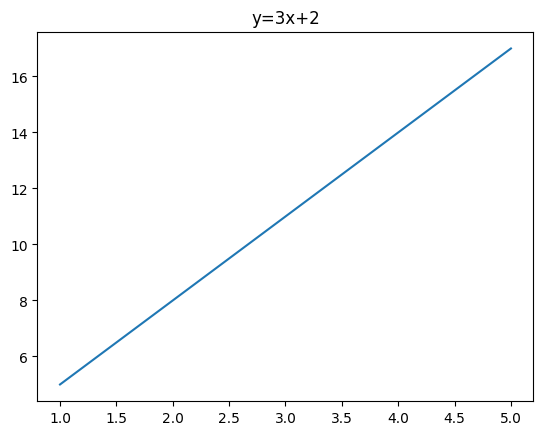

In [8]:
import matplotlib.pyplot as plt

#시각화
plt.plot(x, y)
plt.title('y=3x+2')
plt.show()

**2-5 Sequential API**

- 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하여 모델 생성하는 방식
- 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다는 단점 ->functional API사용

1) 모델 구조

방법 1. 파이썬 리스트 형태로 여러 층 입력

In [9]:
#dense 레이어 3개를 갖는 모델
import tensorflow as tf

#리스트형
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

방법 2. add함수 이용

In [10]:
#add 함수로 레이어 추가
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

2) 입력 데이터 형태
- 첫번째 층은 반드시 input_shape 매개변수 지정

In [11]:
import tensorflow as tf
model=tf.keras.Sequential([
    #입력 데이터의 shape=(150, 4)인 경우 input_shape [4]로 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

3) 단순선형회귀 모델 정의

1개의 뉴런을 가지는 dense레이어 한개를 사

In [12]:
#단순선형회귀 모델 생성
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) #input_shape=[1]은 입력 데이터는 x 값을 나타내는 입력 변수가 1개
])

**2-6 모델 요약**

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- 층별 모델 개수 확인가능 
- total params : 모든 파라미터 합계 표시 (w,b 2개)
- trainable params : 모델 훈련 시 업데이트할 파라미터 총 개수
- no -trainable params : 모델 훈련 시 업데이트 안 할 파라미터 총 개수

**2-7 컴파일**

컴파일 단계에서는 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 등을 정의한다

In [14]:
#긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

In [15]:
#짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [17]:
#클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

In [18]:
#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

**2-8 훈련**

가중치 w 업데이트하는 과정

In [19]:
#훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 640ms/step - loss: 58.8690 - mae: 7.2608
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 34.4537 - mae: 5.5982
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 20.2247 - mae: 4.3288
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 11.9318 - mae: 3.3596
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 7.0980 - mae: 2.6196


loss 줄고있음. 반복횟수 충분하지 않음. 과소적합

In [21]:
#단순 선형회귀 모델 생성
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#훈련
history=model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 362ms/step - loss: 252.4206 - mae: 14.7139
Epoch 2/1200
1/1 [==============================] - 0s 12ms/step - loss: 147.1422 - mae: 11.2626
Epoch 3/1200
1/1 [==============================] - 0s 11ms/step - loss: 85.7909 - mae: 8.6278
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 50.0381 - mae: 6.6163
Epoch 5/1200
1/1 [==============================] - 0s 13ms/step - loss: 29.2028 - mae: 5.0807
Epoch 6/1200
1/1 [==============================] - 0s 11ms/step - loss: 17.0608 - mae: 3.9084
Epoch 7/1200
1/1 [==============================] - 0s 13ms/step - loss: 9.9847 - mae: 3.0133
Epoch 8/1200
1/1 [==============================] - 0s 9ms/step - loss: 5.8608 - mae: 2.3300
Epoch 9/1200
1/1 [==============================] - 0s 10ms/step - loss: 3.4573 - mae: 1.8082
Epoch 10/1200
1/1 [==============================] - 0s 12ms/step - loss: 2.0564 - mae: 1.4098
Epoch 11/1200
1/1 [==============================

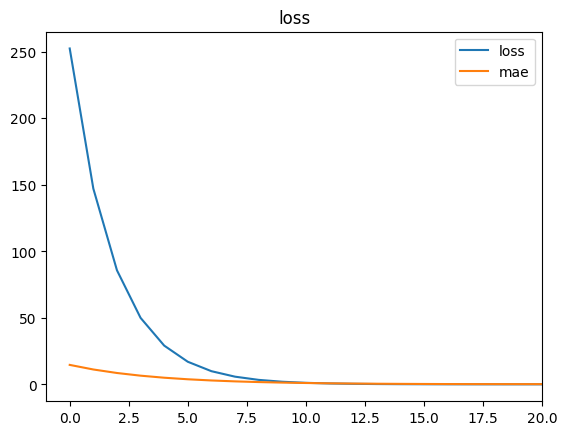

In [22]:
import matplotlib.pyplot as plt

#20 epoch까지 loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('loss')
plt.legend()
plt.show()

초반에는 손실이 급격히 감소하지만 점차 감소 폭이 둔화됨

**2-9 검증**

In [23]:
#검증
model.evaluate(x, y)

1/1 [==============================] - 0s 159ms/step - loss: 3.1624e-05 - mae: 0.0048


[3.1623607355868444e-05, 0.004826736636459827]

**2-10 예측**

In [24]:
#예측
model.predict([10])

1/1 [==============================] - 0s 97ms/step


array([[32.02333]], dtype=float32)

### 3 심층 신경망으로 이미지 분류

**3-1 케라스 내장 데이터셋 로드**

In [25]:
import tensorflow as tf

#케라스 내장 데이터셋에서 mnist 데이터셋 로드
mnist=tf.keras.datasets.mnist

In [26]:
#load_data()로 데이터 로드
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [27]:
#로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


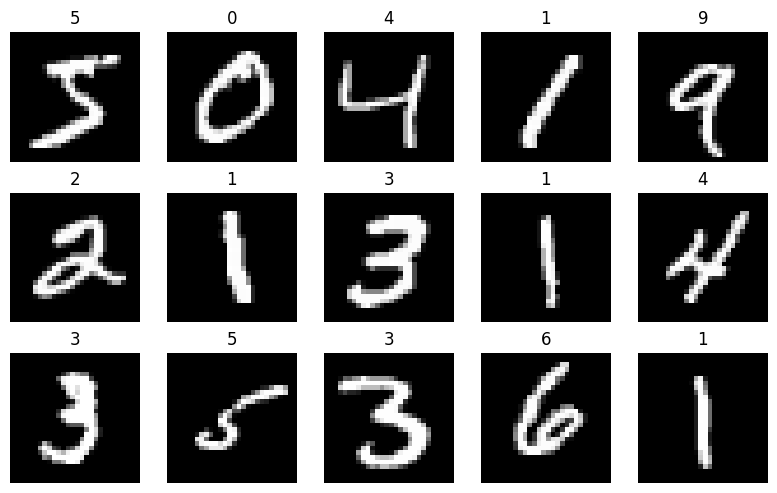

In [28]:
#데이터 시각화
import matplotlib.pyplot as plt

#canvas 생성
fig, axes=plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax=axes[i//5, i%5]
  #imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()
     

**3-2 데이터 전처리**

- 정규화를 통해 데이터 범위 조절

In [29]:
x_train[0,10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

- 0~255 범위의 값으로 이루어짐
- 255로 나눈다

In [30]:
#픽셀 값의 최소/최대 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

#데이터 정규화
x_train=x_train/x_train.max()

#정규화 후 최소/최대 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [31]:
#test에도 정규화 동일 적용
x_test=x_test/x_test.max()

In [32]:
#변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

**3-3 Flatten 레이어**
- 샘플 이미지 형태는 (28*28)이며 2차원 입력이다. 2차원 입력은 dense에 넣을 수 없다. 전처리 필요.

In [33]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D로 shape 변경 후: (60000, 784)


In [34]:
print(f'변경 전 shape: {x_train.shape}')

#flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


**3-4 활성화 함수**

In [35]:
#Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [36]:
#Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

**3-5 입력과 출력**

- 분류 모델의 가장 마지막 레이어는 출력층
- 출력층의 노드 개수는 반드시 분류해야할 클래스의 개수와 동일해야한다. mnist의 경우는 10개. 

In [37]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    #노드=10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'),
])

- 출력층의 노드가 2개 이상인 경우는 softmax 활성화 함수를 적용한다. (다중 분류 문제). 
- 이진 분류 모델의 경우는 시그모이드 적용. 단, 이진 분류여도 출력 레이어의 클래스를 원핫 인코딩으로 변환해 노드 개수가 2개면 softmax 적용.

In [38]:
#출력층 노드 =1 인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')
#출력층 노드 =2 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

**3-6. 손실함수**

분류 모델의 손실함수는 모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련한다.

이진 분류기 생성 시 노드 개수 1이면 활성화 함수는 시그모이드, 손실함수는 binary_crossentropy 지정

In [39]:
#이진 분류 (출력 노드 개수 =1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

다중 분류 모형은 활성화 함수는 소프트맥스, 손실함수는 categorical_crossentropy 혹은 sparse_categorical_crossentropy 지정

In [40]:
#y가 원핫 벡터인 경우
#[0.. 0.. 0.. 1.. 0..]
model.compile(loss='categorical_crossentropy')
#y가 원핫 벡터가 아닌 경우 -> mnist의 경우
#[5]
model.compile(loss='sparse_categorical_crossentropy')  

**3-7 옵티마이저**

- 손실을 낮추기 위해, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법. 일반적으로 Adam 알고리즘을 사용.

In [42]:
#클래스 인스턴스로 지정
adam=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer=['adam'])

**3-8 평가지표**
- 분류 모델에서는 accuracy가 가장 흔히 사용.

In [43]:
#클래스 인스턴스로 지정
acc=tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc]) 

In [44]:
#문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**3-9. 훈련**

In [45]:
#훈련
model.fit(x_train, y_train,
          #검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2388 - accuracy: 0.9271 - val_loss: 0.1242 - val_accuracy: 0.9611
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0943 - accuracy: 0.9706 - val_loss: 0.0938 - val_accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0681 - accuracy: 0.9786 - val_loss: 0.0810 - val_accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0501 - accuracy: 0.9838 - val_loss: 0.1000 - val_accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0412 - accuracy: 0.9868 - val_loss: 0.1010 - val_accuracy: 0.9721
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0746 - val_accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.0814 - val_ac

**3-10 평가**

In [46]:
#검증
test_loss, test_acc=model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9788
검증 셋 정확도: 0.9787999987602234


**3-11 예측**

In [47]:
#예측
predictions=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [48]:
#예측 결과 출력
predictions[0]

array([2.4474886e-10, 1.8675644e-07, 4.8875762e-08, 1.1601940e-06,
       3.1733746e-10, 3.6061848e-11, 4.2349457e-12, 9.9999827e-01,
       1.4419588e-09, 2.1989260e-07], dtype=float32)

모델의 마지막 노드가 10개라 10개의 값이 출력됨. 이 중 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스.

In [49]:
import numpy as np

#0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

#첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


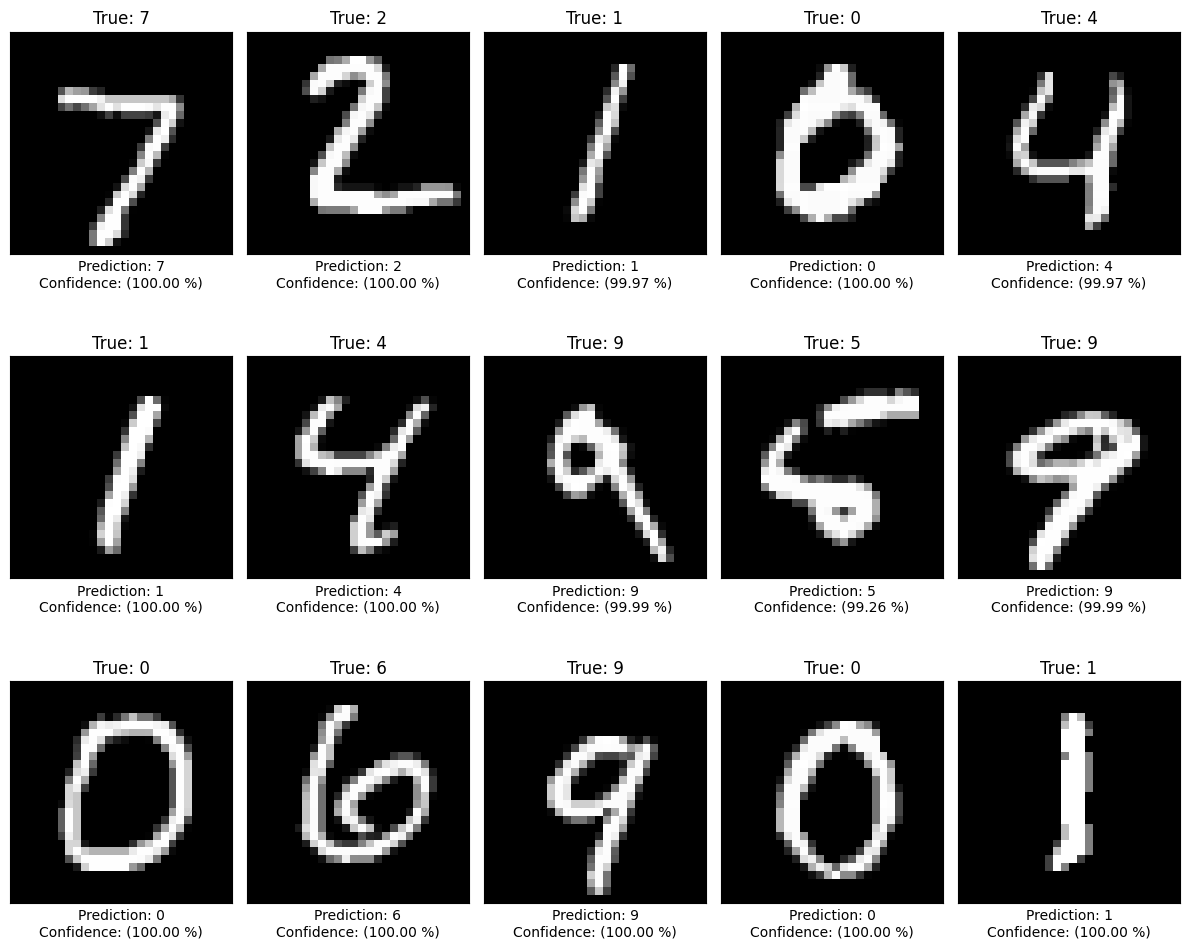

In [50]:
#데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence=x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

#canvas 생성
fig, axes=plt.subplots(3,5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax=axes[i//5, i%5]
  img, y_true, y_pred, confidence=get_one_result(i)
  #imshow로 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()